<center><h1>Wine Data Analysis</h1></center>

**Analysis by Edgar Ortega**

Dataset obtained from the UCI Machine Learning Respository: https://archive.ics.uci.edu/ml/datasets/Wine+Quality

## Dataset Information:
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.). The quality classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant.

## Attribute (column) Information:

**Input variables (based on physicochemical tests):**<br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>

**Output variable (based on sensory data):**<br>
12 - quality (score between 0 and 10)

## Goal:
Model wine quality based on physicochemical tests

## Results:
No accurate predictive model could be obtained. The dataset was unbalanced, this resulted in there being more data for wines with quality scores of 5, 6, and 7. However, there were not enough data points for wines with other quality scores. This includes high scores of 9. 

For wines with quality scores of 5, 6, and 7, we were able to obtain a model with precision scores of 67%, 72%, and 47% respectively. In addition to this, we discovered that the attribute most correlated with a higher quality score was alcohol. Shown below are two plots showing this correlation for red wine, but was true for white wines as well.

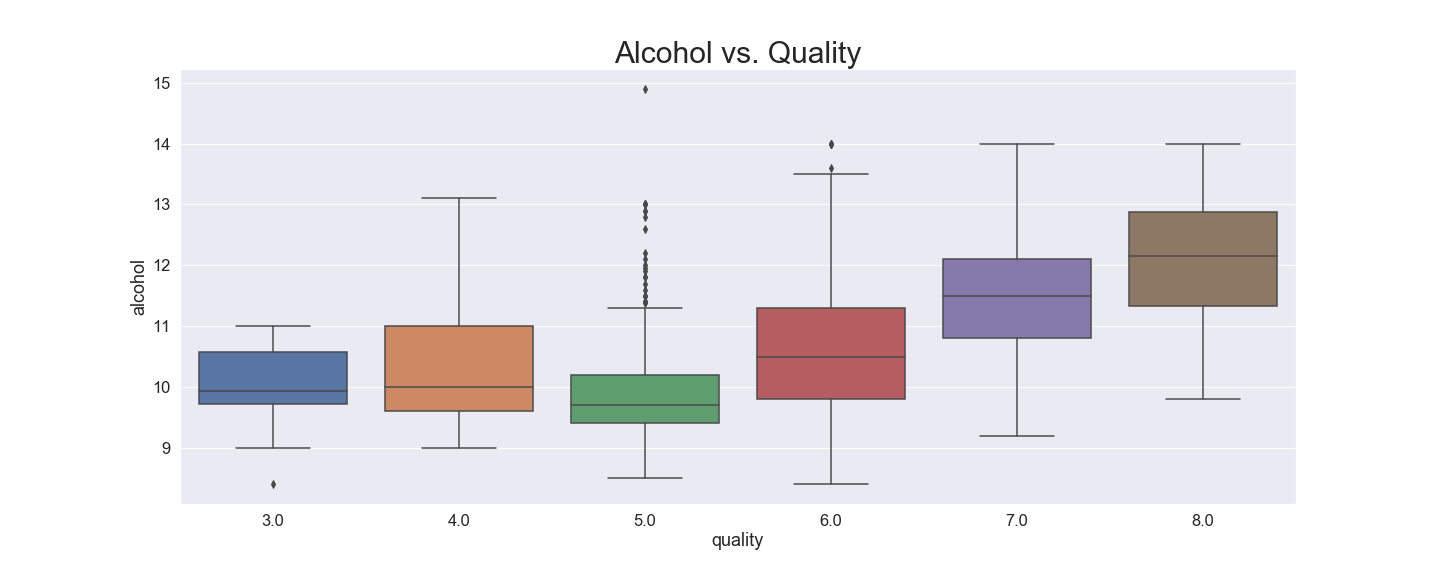

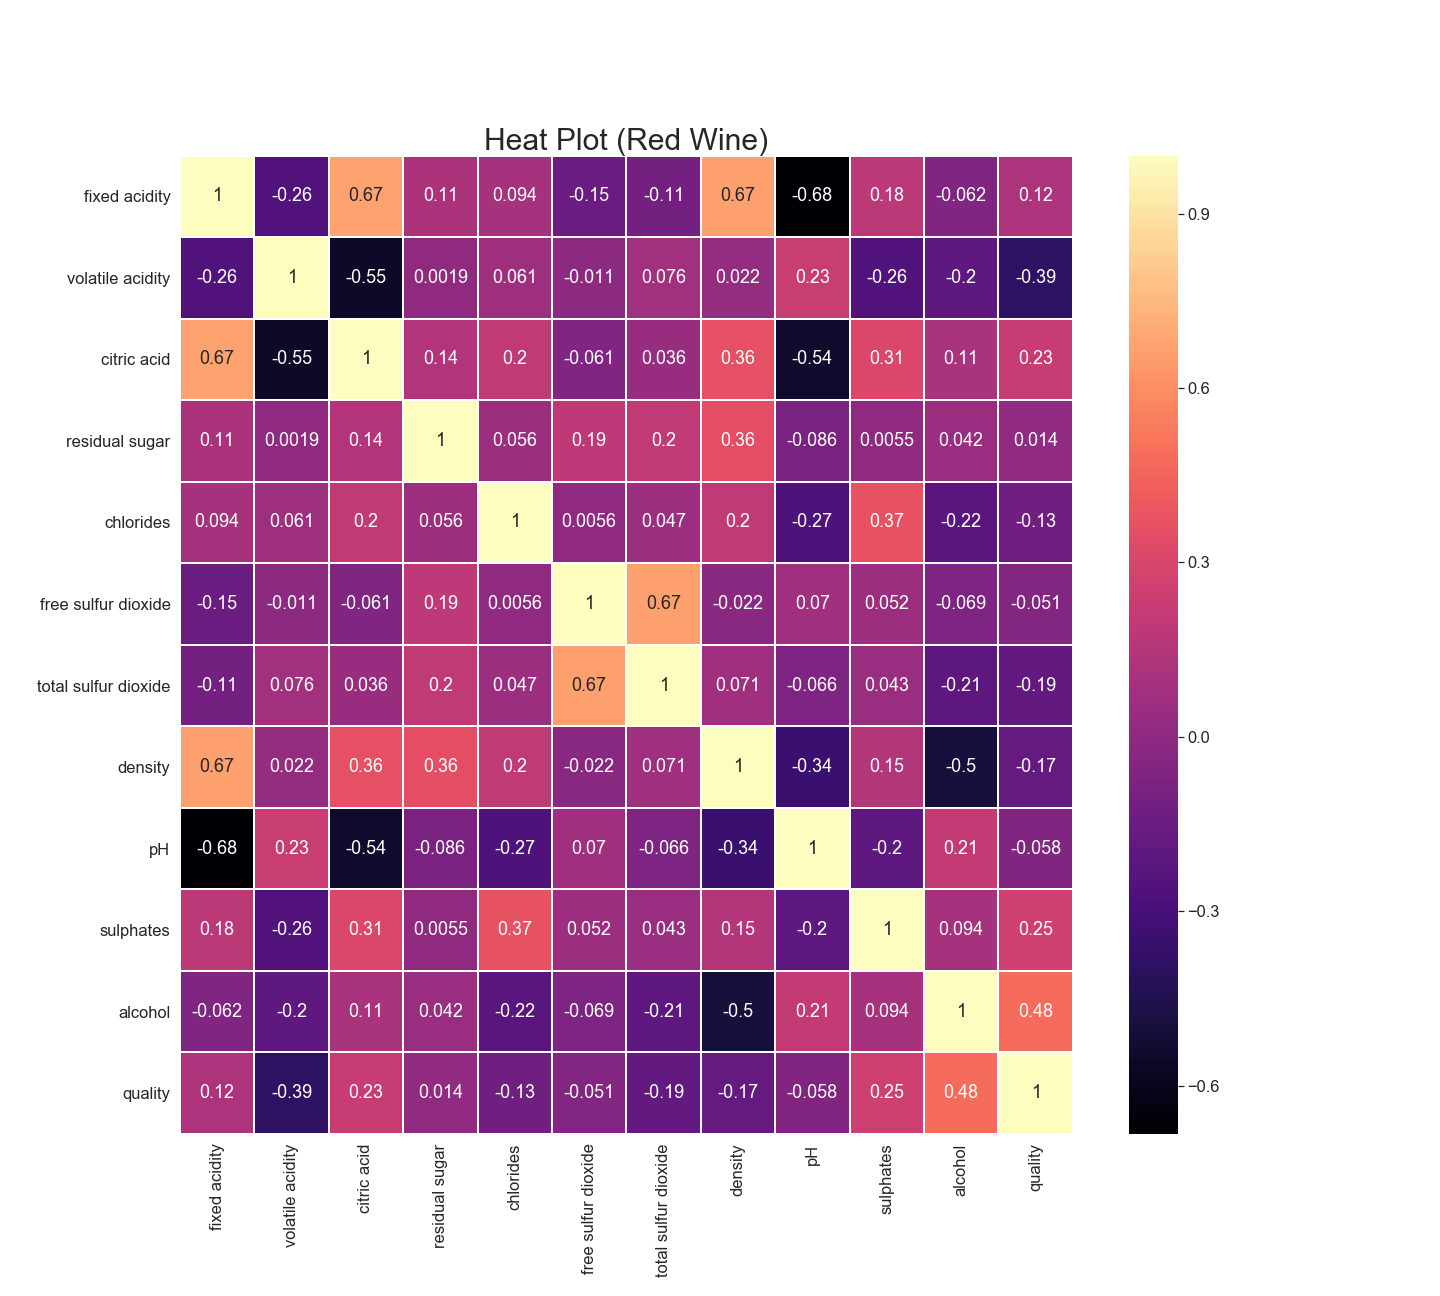

<h1><center>Building Plots and Prediction Model</center></h1>

In [29]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["patch.force_edgecolor"] = True

In [30]:
# read the csv files for both red and white wines
wwine = pd.read_csv('winequality-white.csv')
rwine = pd.read_csv('winequality-red.csv')

In [31]:
# Take a look at our csv files
# We see that all the information is containted in one column
rwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 1 columns):
fixed acidity;"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"    1599 non-null object
dtypes: object(1)
memory usage: 12.6+ KB


In [32]:
rwine.head()

,"fixed acidity;""volatile acidity"";""citric acid"";""residual sugar"";""chlorides"";""free sulfur dioxide"";""total sulfur dioxide"";""density"";""pH"";""sulphates"";""alcohol"";""quality"""
0,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5
1,7.8;0.88;0;2.6;0.098;25;67;0.9968;3.2;0.68;9.8;5
2,7.8;0.76;0.04;2.3;0.092;15;54;0.997;3.26;0.65;...
3,11.2;0.28;0.56;1.9;0.075;17;60;0.998;3.16;0.58...
4,7.4;0.7;0;1.9;0.076;11;34;0.9978;3.51;0.56;9.4;5


<h2>Cleaning our DataFrame</h2><br><h3>Creating multiple columns for our attributes</h3>

In [34]:
# Grab our columns
wwine_col = wwine.columns
rwine_col = rwine.columns

In [35]:
# Split columns into multiple strings
wwine_col = wwine_col[0].split(';')
rwine_col = rwine_col[0].split(';')

In [36]:
print(rwine_col)

['fixed acidity', '"volatile acidity"', '"citric acid"', '"residual sugar"', '"chlorides"', '"free sulfur dioxide"', '"total sulfur dioxide"', '"density"', '"pH"', '"sulphates"', '"alcohol"', '"quality"']


In [37]:
# Cleans up our strings
wwine_columns =[]
rwine_columns =[]

for i in wwine_col:
    wwine_columns.append(''.join(filter(lambda col: col != '"', i)))

for i in rwine_col:
    rwine_columns.append(''.join(filter(lambda col: col != '"', i)))

In [38]:
rwine_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [7]:
# Creating empty dictionaries for our white and red wine data.

wht_dictionary = {}
red_dictionary = {}

In [8]:
# This code block fills the red_dictionary (red wine) in. The columns from rwine_columns are set as keys,
# and the rows are split up and set as values.

for i in range(0,12):
    red_dictionary[rwine_columns[i]] = []
    for j in range(0,len(rwine.loc[:])):
        red_dictionary[rwine_columns[i]].append(float(rwine.loc[j][0].split(';')[i]))

In [9]:
# This code blocks fills the wht_dictionary (white wine) in.

for i in range(0,12):
    wht_dictionary[wwine_columns[i]] = []
    for j in range(0,len(wwine.loc[:])):
        wht_dictionary[wwine_columns[i]].append(float(wwine.loc[j][0].split(';')[i]))

In [10]:
# This block creates our new DataFrame from our dictionaries
white_df = pd.DataFrame.from_dict(wht_dictionary)
red_df = pd.DataFrame.from_dict(red_dictionary)

In [13]:
# Lets look at out Dataset now
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


We will create a heat map to see if any of the columns are correlated with one another. The point is to find out whether any of the columns are strongly correlated with the 'quality' column. Focus on the right most column labeled 'quality'. We see that the row most correlated with it, is the one labeled 'alcohol'. Therefore we  can assume the alchocol content in the wine is somewhat associated with a higher quality rating. This true for both types of wine (red and white).

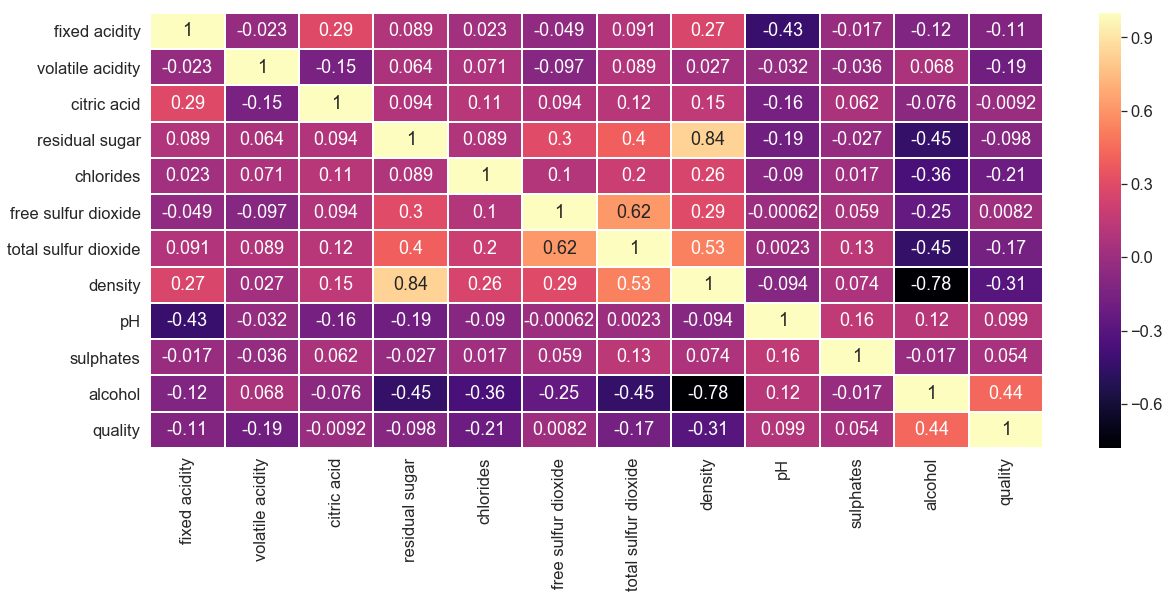

In [14]:
# White wine correlations
sns.set(font_scale=1.5)
plt.figure(figsize=(20,8))
sns.heatmap(white_df.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)

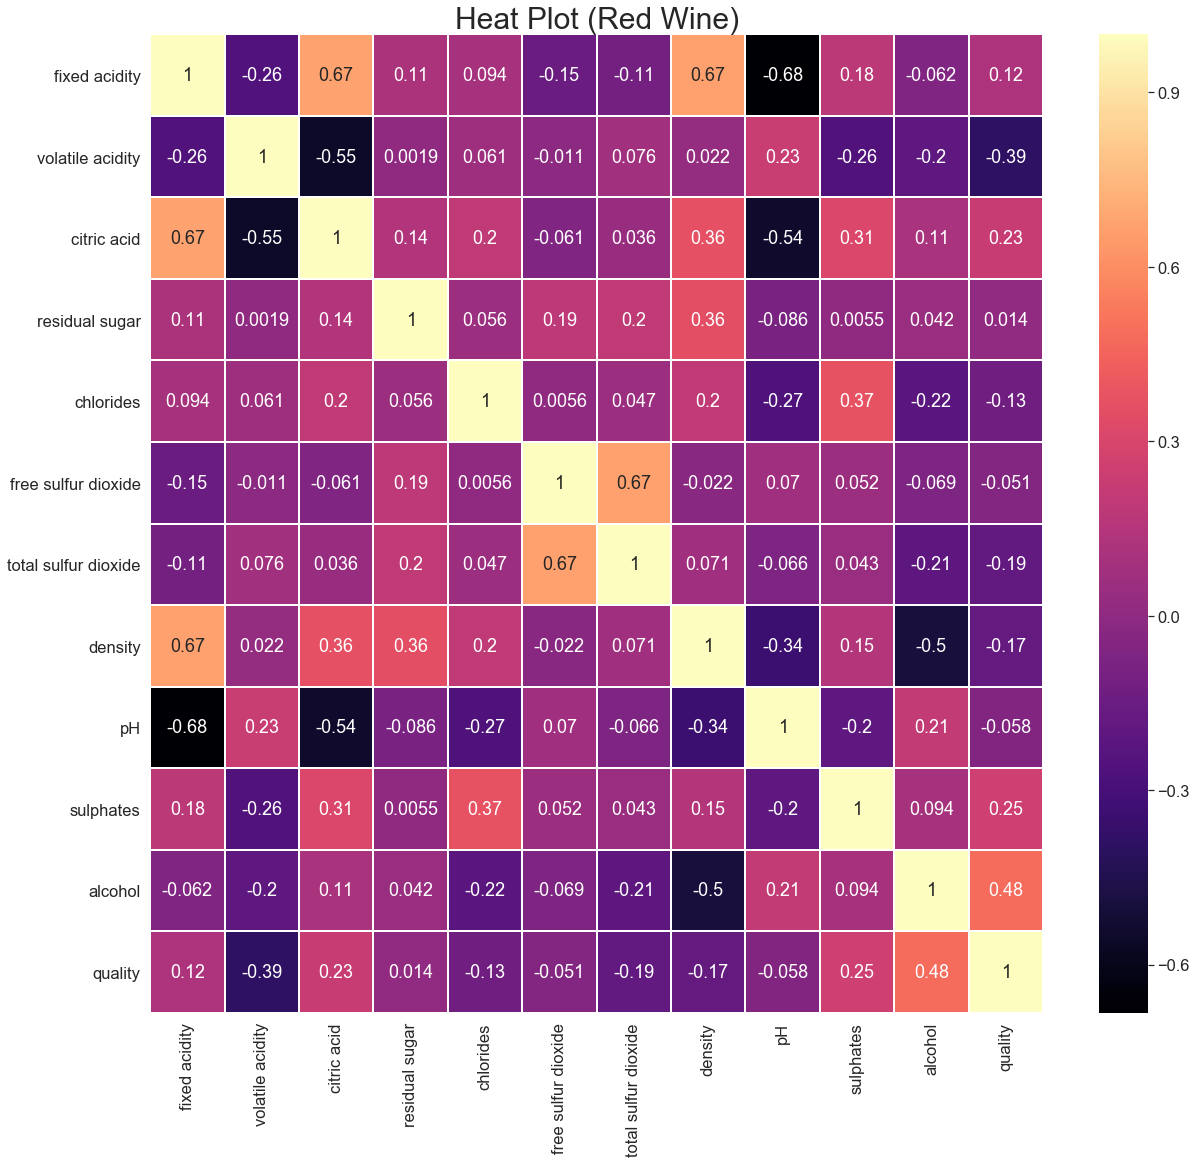

In [27]:
# Red wine correlations
sns.set(font_scale=1.5)
plt.figure(figsize=(20,18))
sns.heatmap(red_df.corr(),cmap='magma',linecolor='white',linewidths=1,annot=True)
plt.title('Heat Plot (Red Wine)',fontsize=30)
# plt.savefig('rwine_heatplot')

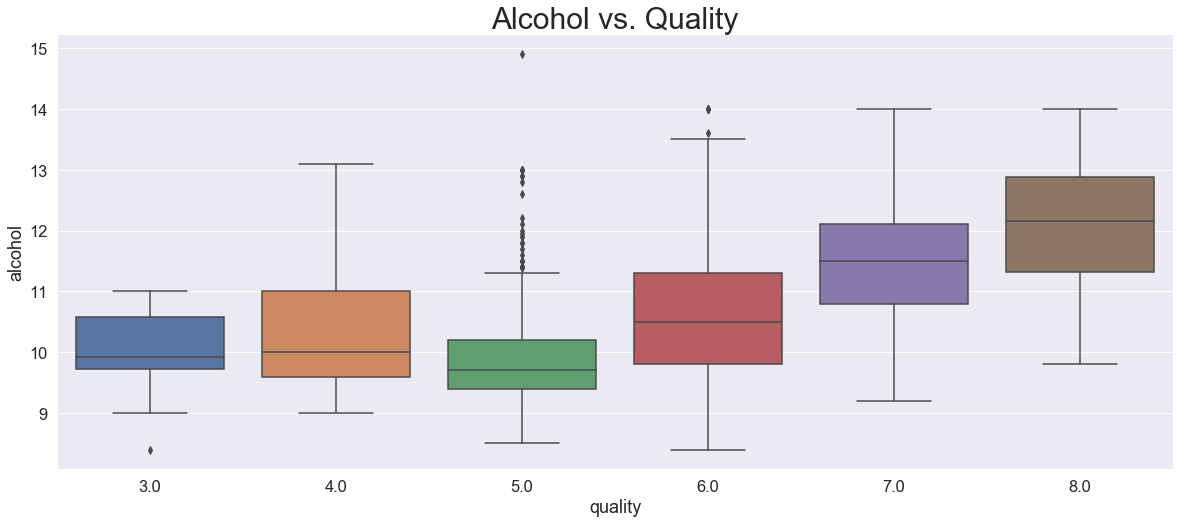

In [28]:
# Create a boxplot to visualize relationship between alcohol and quality score
sns.set(font_scale=1.5)
plt.figure(figsize=(20,8))
sns.boxplot(x='quality',y='alcohol',data=red_df)
plt.title('Alcohol vs. Quality',fontsize=30)
# plt.savefig('rwine)boxplot')

In [58]:
print('Average alcohol content in White wine based on quality rating\n')
print('Quality > 6: ',white_df[white_df['quality']>6]['alcohol'].mean())
print('Quality < 6: ',white_df[white_df['quality']<6]['alcohol'].mean())

Average alcohol content in White wine based on quality rating

Quality > 6:  11.416022012578603
Quality < 6:  9.849530487804872


In [59]:
print('Average alcohol content in Red wine based on quality rating\n')
print('Quality > 6: ',red_df[red_df['quality']>6]['alcohol'].mean())
print('Quality < 6: ',red_df[red_df['quality']<6]['alcohol'].mean())

Average alcohol content in Red wine based on quality rating

Quality > 6:  11.518049155145922
Quality < 6:  9.926478494623645


<h2>Creating a Predictive Model</h2>

In [102]:
# We are using a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [220]:
# Lets look at our unbalanced data
white_df[(white_df['quality'] != 9) & (white_df['quality'] != 3)]['quality'].apply(int).value_counts()

6    2198
5    1457
7     880
8     175
4     163
Name: quality, dtype: int64

In [39]:
# Our red wine dataset has less data points
red_df['quality'].value_counts()

5.0    681
6.0    638
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

In [270]:
# Split our data into a training and testing set
X = white_df.drop('quality',axis=1)
y = white_df['quality'].apply(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=40)

In [271]:
# Create Random Forest Object
rfc = RandomForestClassifier()

In [272]:
# Train the Model
rfc.fit(X_train,y_train)

/Users/edgaro/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [273]:
# Test our Model
predictions = rfc.predict(X_test)

In [274]:
from sklearn.metrics import classification_report, confusion_matrix

We are able to obtain a more accurate prediction for quality scores 5, 6, and 7. This is due to those classes having more data to train our model with.

In [275]:
# Measure the accuracy of our model
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.24      0.45      0.31        31
           5       0.67      0.62      0.65       626
           6       0.72      0.65      0.68       993
           7       0.47      0.59      0.52       273
           8       0.36      0.73      0.48        37
           9       0.00      0.00      0.00         0

    accuracy                           0.63      1960
   macro avg       0.35      0.43      0.38      1960
weighted avg       0.65      0.63      0.64      1960



/Users/edgaro/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/edgaro/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/edgaro/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
